In [3]:
import math


class Trig:

    @staticmethod
    def sin(x):
        return math.sin(x)

    @staticmethod
    def cos(x):
        return math.cos(x)

    @staticmethod
    def tan(x):
        return math.tan(x)

    @staticmethod
    def arcsin(x):
        return math.asin(x)

    @staticmethod
    def arccos(x):
        return math.acos(x)

    @staticmethod
    def arctan(x):
        return math.atan(x)

    @staticmethod
    def to_radians(x):
        return x * math.pi / 180


a = 60
r = Trig.to_radians(a)
print(r)


1.0471975511965976


In [4]:
T = ["a", ["b", "c"], [["d", "e"], ["f"]]]
depth = 2
print("Root: ", T[0])
ltree, rtree = [], []
for i in range(1, depth+1):
    ltree.append(T[i][0])
    rtree.append(T[i][1])
print("Left tree: ", ltree)
print("Right tree: ", rtree)


Root:  a
Left tree:  ['b', ['d', 'e']]
Right tree:  ['c', ['f']]


In [5]:
class Node:
    def __init__(self, val):
        self.l = None
        self.r = None
        self.v = val


class Tree:
    def __init__(self):
        self.root = None

    def add(self, val):
        if self.root is None:
            self.root = Node(val)
        else:
            self._add(val, self.root)

    def _add(self, val, node):
        if val < node.v:
            if node.l is not None:
                self._add(val, node.l)
            else:
                node.l = Node(val)
        else:
            if node.r is not None:
                self._add(val, node.r)
            else:
                node.r = Node(val)

    def printTree(self):
        if self.root is not None:
            self._printTree(self.root)

    def _printTree(self, node):
        if node is not None:
            self._printTree(node.l)
            print(str(node.v) + ' ')
            self._printTree(node.r)


,0,1
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


Shape: (6, 2)


((4, 2), (2, 2), (4,), (2,))

,0,1
1,-2,-1
5,3,2
0,-1,-1
3,1,1


array([0, 1, 0, 1])

[Text(0.5, 0.75, 'X[0] <= 0.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

array([1, 0])

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



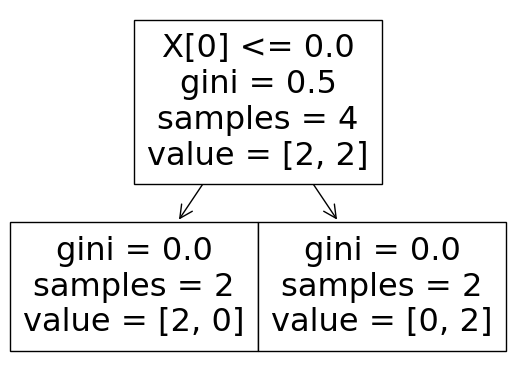

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

x = pd.DataFrame(
    np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]))
display(x)
print("Shape:", x.shape)
target = np.array([0, 0, 0, 1, 1, 1])
x_train, x_test, y_train, y_test = train_test_split(
    x, target, test_size=0.20)
display((x_train.shape, x_test.shape, y_train.shape, y_test.shape))
display(x_train)
display(y_train)
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
display(tree.plot_tree(classifier))
y_pred = classifier.predict(x_test)
display(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


Shape: (48, 5)


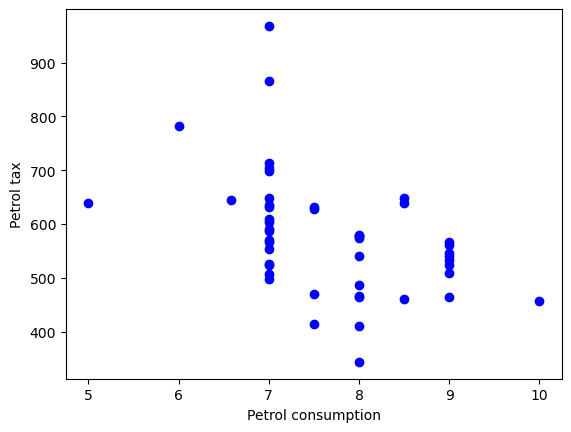

,Actual,Predicted
0,534,541.0
1,410,414.0
2,577,554.0
3,571,554.0
4,577,631.0
5,704,644.0
6,487,628.0
7,587,649.0
8,467,414.0
9,580,464.0


MSE:  4738.9
MAE:  53.7
9.310456926133286


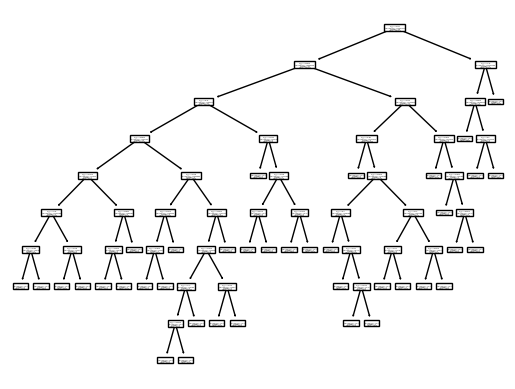

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataset = pd.read_csv(url)
display(dataset.head(10))
print("Shape:", dataset.shape)
plt.scatter(dataset['Petrol_tax'],
            dataset['Petrol_Consumption'], color='b', label='Petrol Tax')
plt.xlabel("Petrol consumption")
plt.ylabel("Petrol tax")
plt.show()
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
tree.plot_tree(regressor)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print(mae / np.average(y) * 100)
